## The purpose of this notebook is to take random contacts and assign them to cities according to the population of those cities.  

Then assign each contact to a k-means cluster via lat and lon as the only two variables

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import choices

import warnings
warnings.filterwarnings('ignore')  #set to ignore or default

#read the data file for cites
path = 'data/uscitiesv1.4.csv'
citiesDF = pd.read_csv(path)
#print("df shape:", df.shape)

#read the data file for contacts
path = 'data/contacts3.csv'
contactsDF = pd.read_csv(path)
print("\nThis cell loads the contacts in contactsDF and cities in citiesDF")
print("citiesDF shape:", citiesDF.shape, "\tcontactsDF shape: ", contactsDF.shape)
contactsDF


This cell loads the contacts in contactsDF and cities in citiesDF
citiesDF shape: (36651, 16) 	contactsDF shape:  (20000, 4)


,FirstName,LastName,MobilePhone,email
0,Elza,Bergstrom,090-548-1199,Elza.Bergstrom22@example.com
1,Deontae,Lehner,363-107-4285,Deontae.Lehner78@example.com
2,Eveline,Hermiston,494-946-8752,Eveline.Hermiston0@example.com
3,Eladio,Gorczany,215-006-9542,Eladio14@example.com
4,Diamond,Wiegand,686-523-5208,Diamond48@example.com
5,Shayne,Schultz,964-611-7860,Shayne93@example.com
6,Mohammed,Cummings,205-598-3075,Mohammed.Cummings@example.com
7,Darryl,Blanda,421-508-1039,Darryl.Blanda@example.com
8,Shaniya,Boyer,124-731-8320,Shaniya.Boyer90@example.com
9,Imani,Monahan,201-562-2858,Imani.Monahan84@example.com


In [2]:
df2 =  citiesDF.loc[citiesDF['population'] > 100].sort_values(by=['population'],ascending=False)
cityIndex = df2.index.values
population = df2['population'].values
print("This cell creates two arrays: one for the cityIndex and one for the population")
print("They will be used to select a weighted random city for each of the contacts")

This cell creates two arrays: one for the cityIndex and one for the population
They will be used to select a weighted random city for each of the contacts


In [3]:

#choices(cityIndex,population)  will pick from the cityIndex array based on the weight of population

# create an array of cities, one for each contact 
arr = []
for x in range (0,len(contactsDF)):
    arr.append(choices(cityIndex,population))
# convert array to data frame    df['index1'] = df.index
randomCityDf = pd.DataFrame(arr, columns=['cityId'])

#make common keys
randomCityDf['key'] = randomCityDf.index
contactsDF['key'] = contactsDF.index

#merge the contact data fram with the randomCity Dataframe based on the index of the contacts
mdf1 = pd.merge(contactsDF,randomCityDf,how='left',on='key')

df4 = df2[['city','state_id','county_name','lat','lng','population','density']]
df4.insert(0,'cityId',df4.index)
contactsDF

,FirstName,LastName,MobilePhone,email,key
0,Elza,Bergstrom,090-548-1199,Elza.Bergstrom22@example.com,0
1,Deontae,Lehner,363-107-4285,Deontae.Lehner78@example.com,1
2,Eveline,Hermiston,494-946-8752,Eveline.Hermiston0@example.com,2
3,Eladio,Gorczany,215-006-9542,Eladio14@example.com,3
4,Diamond,Wiegand,686-523-5208,Diamond48@example.com,4
5,Shayne,Schultz,964-611-7860,Shayne93@example.com,5
6,Mohammed,Cummings,205-598-3075,Mohammed.Cummings@example.com,6
7,Darryl,Blanda,421-508-1039,Darryl.Blanda@example.com,7
8,Shaniya,Boyer,124-731-8320,Shaniya.Boyer90@example.com,8
9,Imani,Monahan,201-562-2858,Imani.Monahan84@example.com,9


In [4]:

output = pd.merge(mdf1,df4)
#csvOutput = output.sort_values('key_0').to_csv(index=False)
csvOutput = output.sort_values('LastName').to_csv(index=False)
#csvOutput = output.to_csv(index=False)

contactsFile = open("contacts.csv","w")
contactsFile.write(csvOutput)
output


,FirstName,LastName,MobilePhone,email,key,cityId,city,state_id,county_name,lat,lng,population,density
0,Elza,Bergstrom,090-548-1199,Elza.Bergstrom22@example.com,0,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
1,Alvena,Steuber,078-138-0563,Alvena31@example.com,121,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
2,Alan,Waelchi,432-947-4602,Alan_Waelchi68@example.com,151,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
3,Marvin,Streich,678-269-8641,Marvin5@example.com,301,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
4,Reta,Littel,421-219-7177,Reta_Littel@example.com,402,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
5,Marcel,Schowalter,003-273-1401,Marcel.Schowalter6@example.com,579,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
6,Jayson,Kling,225-526-8246,Jayson_Kling23@example.com,611,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
7,Casper,Abernathy,788-180-7569,Casper49@example.com,825,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
8,Sim,Ankunding,388-571-9854,Sim.Ankunding15@example.com,827,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0
9,Marguerite,Kshlerin,201-070-2837,Marguerite33@example.com,862,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0


In [5]:
summary = output.groupby(by="city").size().reset_index(name='counts')
summary.sort_values('counts',ascending=False)

,city,counts
1902,New York,1118
1570,Los Angeles,704
490,Chicago,475
1710,Miami,388
650,Dallas,328
2151,Philadelphia,320
1240,Houston,295
2921,Washington,287
111,Atlanta,283
282,Boston,240


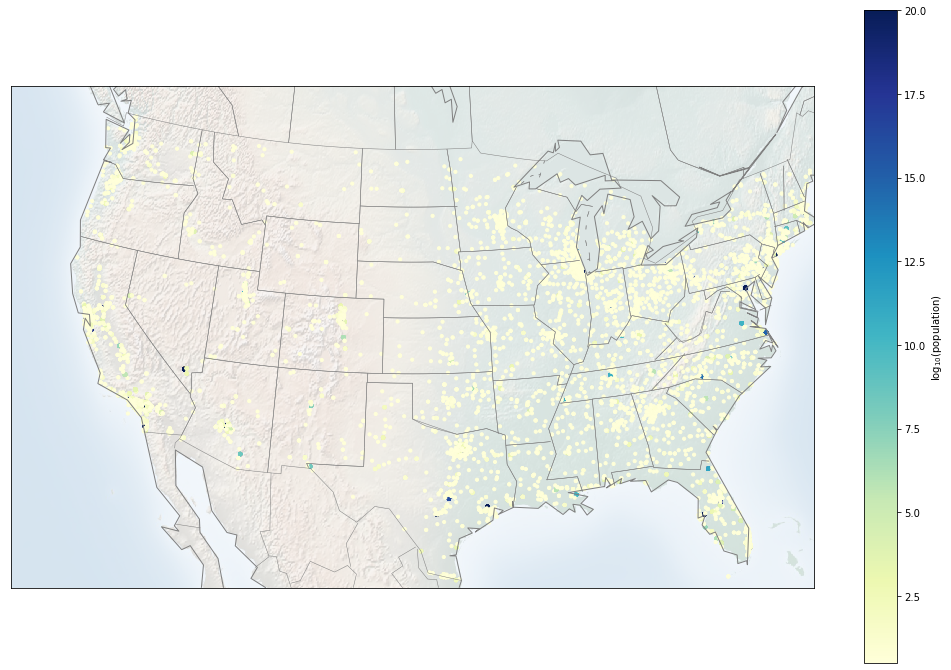

In [6]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap


#contacts
contacts = output
lat = contacts['lat'].values
lon = contacts['lng'].values
population = contacts['population'].values
area = contacts['density'].values

# 1. Draw the map background
fig = plt.figure(figsize=(18, 12))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m.shadedrelief(alpha=0.3)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')



# 2. scatter city data, with color reflecting population and size reflecting area

m.scatter(lon, lat, latlon=True,
          #c=np.log10(population), s=area,
          #c=np.log10(population), s=8,
          c=population/100000, s=10,
          cmap='YlGnBu', alpha=1.0)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(0.5, 20)


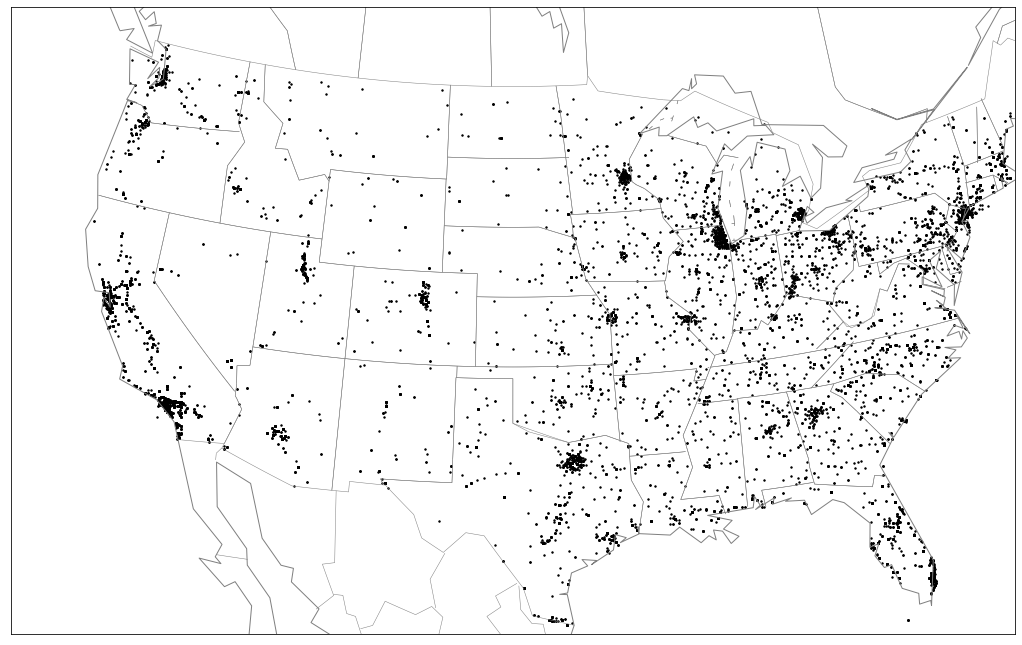

In [7]:
# 1. Draw the map background
fig2 = plt.figure(figsize=(18, 12))
m2 = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m2.drawcoastlines(color='gray')
m2.drawcountries(color='gray')
m2.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m2.scatter(lon, lat, latlon=True,
          #c=np.log10(population), s=area,
          c='black', s=2)

In [8]:
from sklearn import cluster

# reduce data frame to just lat and long and convert to an array
dk = contacts[['lat','lng']].values 

k_means2 = cluster.KMeans(n_clusters=12)
k_means2.fit(dk)
#print(k_means2.labels_[::1])
assignment_arr = k_means2.labels_
centers_arr = k_means2.cluster_centers_
print('assignments:\n', assignment_arr)
print('centers:\n',centers_arr)


assignments:
 [ 8  8  8 ... 10 11 11]
centers:
 [[  42.44573569  -94.1104654 ]
 [  41.06002981  -73.79310187]
 [  37.97205353 -121.68695172]
 [  33.79448696  -85.94124701]
 [  31.66647854  -96.46969471]
 [  22.15610408 -158.00390612]
 [  33.96268536 -116.68670724]
 [  27.61194618  -81.03729058]
 [  38.42955319  -78.88207888]
 [  46.9536357  -122.29446064]
 [  39.29034116 -107.58353757]
 [  41.24158786  -86.48713901]]


In [9]:
#columns name
columns_new = ['cluster_id']

#created the data frame
assign_df = pd.DataFrame(assignment_arr, columns=columns_new)
#assign_df 

#join the old data frame d6, with the new assignment data frame
df7 = pd.concat([contacts,assign_df], axis=1, join_axes=[contacts.index])
#df7.dtypes

#now Lets Make a DF for the centers . , lat is 40
center_columns_new = ['lat', 'lng']
df_centers = pd.DataFrame(centers_arr,columns=center_columns_new)
df_centers.index.values

df7

,FirstName,LastName,MobilePhone,email,key,cityId,city,state_id,county_name,lat,lng,population,density,cluster_id
0,Elza,Bergstrom,090-548-1199,Elza.Bergstrom22@example.com,0,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
1,Alvena,Steuber,078-138-0563,Alvena31@example.com,121,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
2,Alan,Waelchi,432-947-4602,Alan_Waelchi68@example.com,151,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
3,Marvin,Streich,678-269-8641,Marvin5@example.com,301,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
4,Reta,Littel,421-219-7177,Reta_Littel@example.com,402,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
5,Marcel,Schowalter,003-273-1401,Marcel.Schowalter6@example.com,579,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
6,Jayson,Kling,225-526-8246,Jayson_Kling23@example.com,611,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
7,Casper,Abernathy,788-180-7569,Casper49@example.com,825,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
8,Sim,Ankunding,388-571-9854,Sim.Ankunding15@example.com,827,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8
9,Marguerite,Kshlerin,201-070-2837,Marguerite33@example.com,862,1684,Washington,DC,District of Columbia,38.9047,-77.0163,5191844.0,4301.0,8


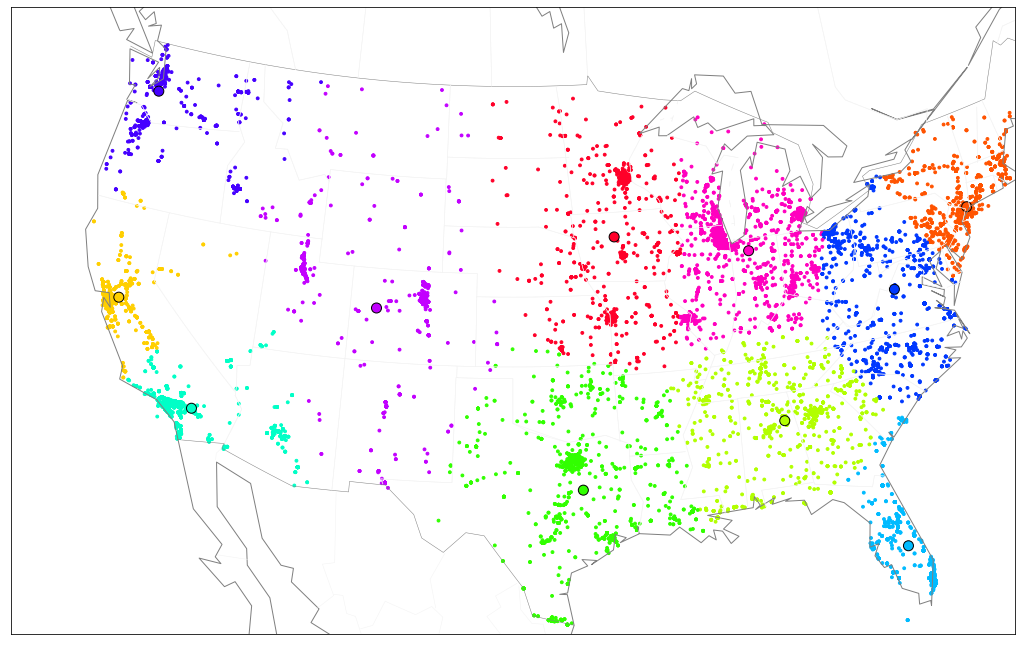

In [10]:
# 1. Draw the map background
fig3 = plt.figure(figsize=(18, 12))
m3 = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m3.drawcoastlines(color='gray')
m3.drawcountries(color='gray')
m3.drawstates(color='#F3F3F3')

lat3 = df7['lat'].values
lon3 = df7['lng'].values
cluster3 = df7['cluster_id'].values

# 2. scatter city data, with color reflecting population
m3.scatter(lon3, lat3, latlon=True,
          #c=np.log10(population), s=area,
            cmap='gist_rainbow', alpha=1.0,
          c=cluster3, s=8)

m3.scatter(df_centers['lng'].values, df_centers['lat'].values, latlon=True, 
           cmap='gist_rainbow', s=100, c=df_centers.index, edgecolors='Black')